In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import warnings

In [52]:
df=pd.read_csv("ElectricCarData.csv")

In [53]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.07
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.00
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.20
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.76
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.75


In [54]:
df.shape

(102, 16)

In [55]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'INR'],
      dtype='object')

In [56]:
# finding null values in the dataset
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
INR                 0
dtype: int64

In [57]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,INR
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,7.391176,179.313725,338.627451,65.415686,189.303922,435.686275,4.882353,55997.588235,4.583352e+06
std,3.031913,43.771228,126.700623,29.955782,29.679072,220.447384,0.799680,34250.724403,2.803391e+06
min,2.100000,123.000000,95.000000,16.700000,104.000000,0.000000,2.000000,20129.000000,1.647541e+06
25%,5.100000,150.000000,250.000000,43.125000,168.000000,260.000000,5.000000,34414.750000,2.816816e+06
50%,7.300000,160.000000,340.000000,64.350000,180.500000,440.000000,5.000000,45000.000000,3.683210e+06
75%,9.000000,200.000000,400.000000,83.700000,204.500000,557.500000,5.000000,65000.000000,5.320192e+06
max,22.400000,410.000000,970.000000,200.000000,273.000000,940.000000,7.000000,215000.000000,1.759756e+07


# Distributing vehicle price above and below INR 4000000

In [58]:
df['CarName'] = df['Brand'] + '-' + df['Model']
df1= df.loc[df['INR'] <=4000000]
df2 = df.loc[df['INR'] >4000000]
t1 = 'less than INR 4000000'
t2 = 'more thanINR 4000000'

# Range of Vehicles

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


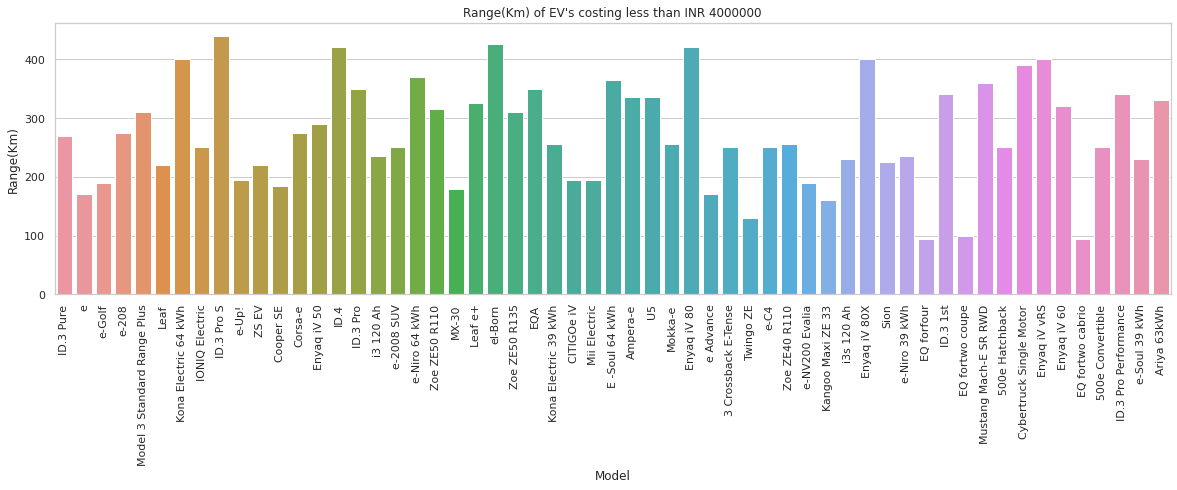

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


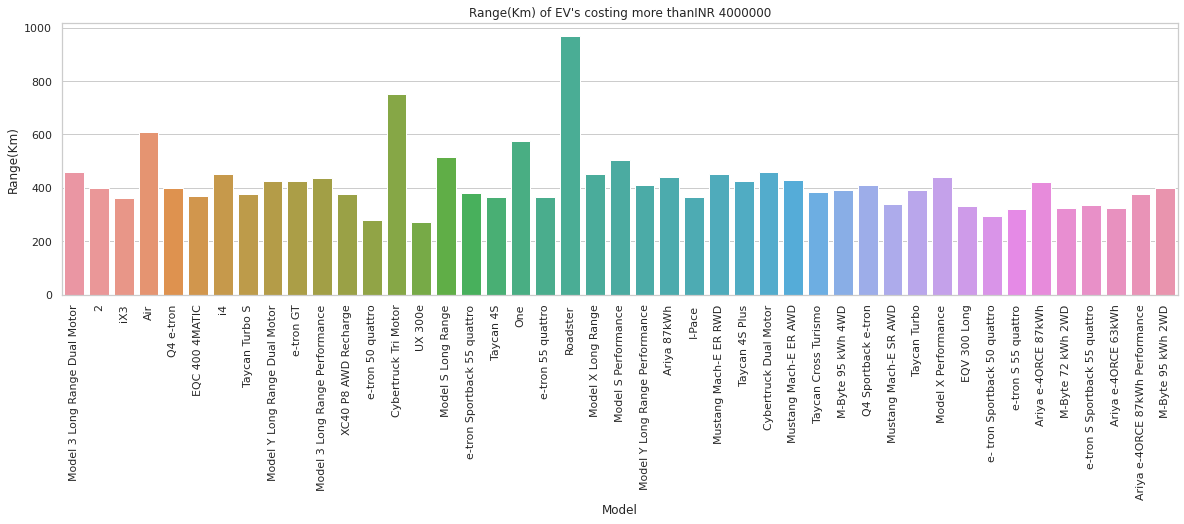

In [60]:
def range(dataframe, price):
    plt.figure(figsize=(20,5))
    sbn.set_theme(style="whitegrid")
    sbn.barplot('Model', 'Range_Km', data=dataframe)
    plt.title('''Range(Km) of EV's costing {}'''.format(price))
    plt.ylabel('Range(Km)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()

range(df1, t1)
range(df2, t2)    

# Range - Battery Pack

<ipython-input-68-e3e4072498e7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df1['CarName'], rotation = 'vertical')


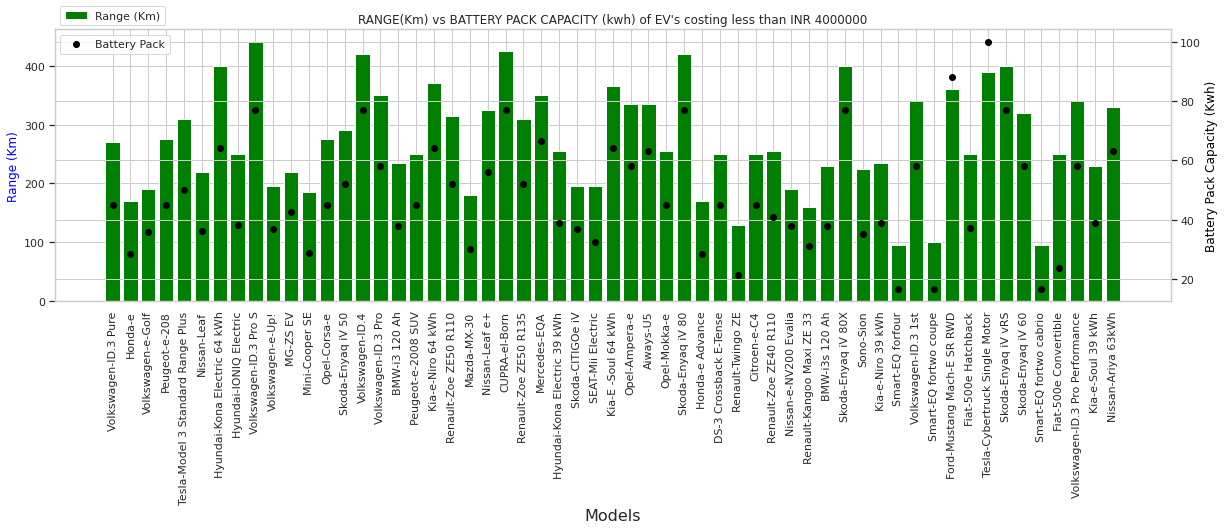

<ipython-input-68-e3e4072498e7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df1['CarName'], rotation = 'vertical')


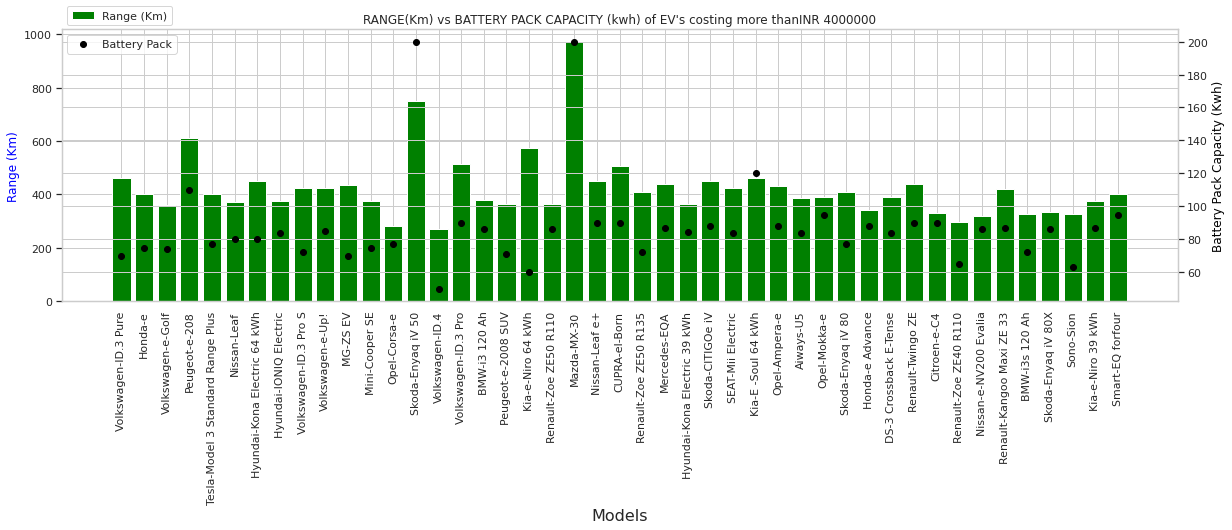

In [68]:
def battery(dataframe, text):
    fig = plt.figure(figsize=(20,5))
    a1= plt.subplot()
    a1.bar(dataframe["CarName"], dataframe["Range_Km"], label='Range (Km)', color='green')
    plt.legend(loc= "upper left", bbox_to_anchor=(0,1.105))
    a2 = a1.twinx()
    a2.scatter(dataframe["CarName"], dataframe["Battery_Pack Kwh"], label= "Battery Pack", color= 'black')
    plt.title('''RANGE(Km) vs BATTERY PACK CAPACITY (kwh) of EV's costing {}'''.format(text), fontsize=12)
    a1.set_xlabel('Models', size= 16)
    a1.set_ylabel('Range (Km)', color = 'blue')
    a2.set_ylabel('Battery Pack Capacity (Kwh)', color='black')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1))
    a1.set_xticklabels(df1['CarName'], rotation = 'vertical')
    plt.show()
    
battery(df1, t1)
battery(df2, t2)

# Acceleration

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


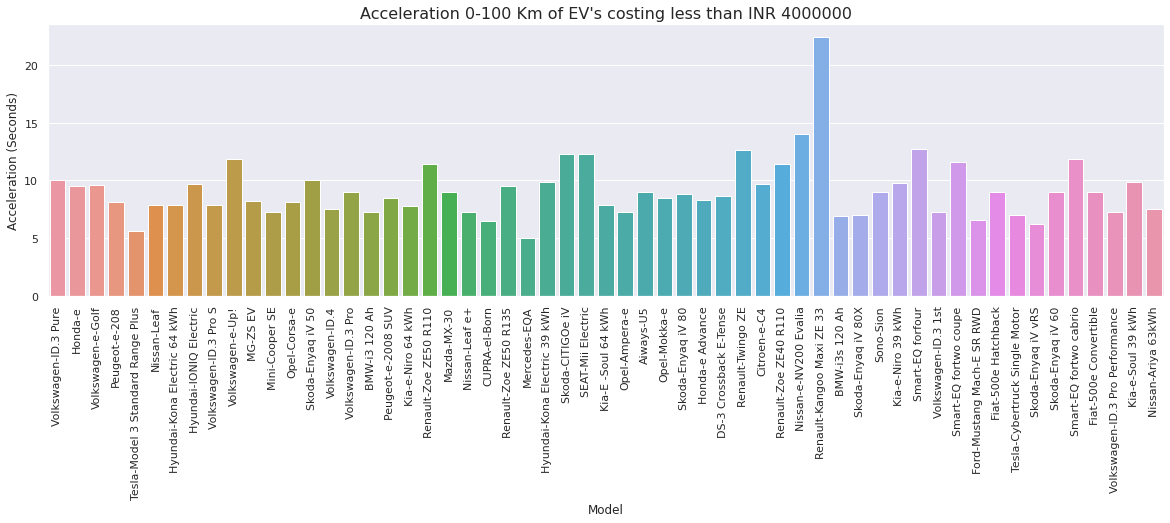

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


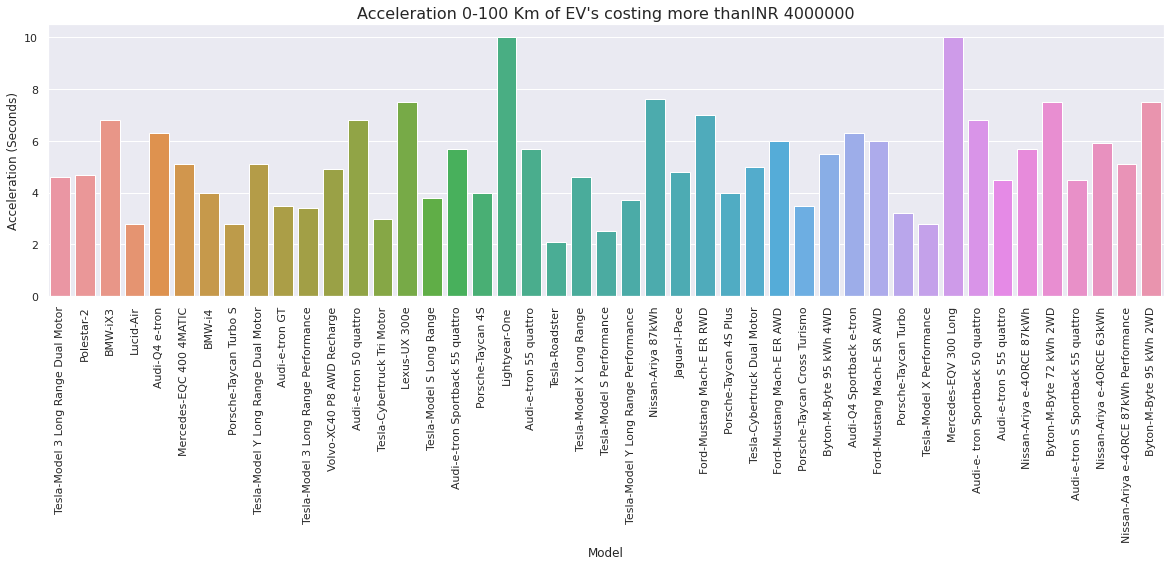

In [62]:
def acc(dataframe, text):
    plt.figure(figsize=(20,5))
    sbn.set_theme(style="darkgrid")
    sbn.barplot('CarName', 'AccelSec', data=dataframe)
    plt.title('''Acceleration 0-100 Km of EV's costing {}'''.format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()
    
acc(df1,t1)
acc(df2,t2) 

# Fast Charging Vehicles

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


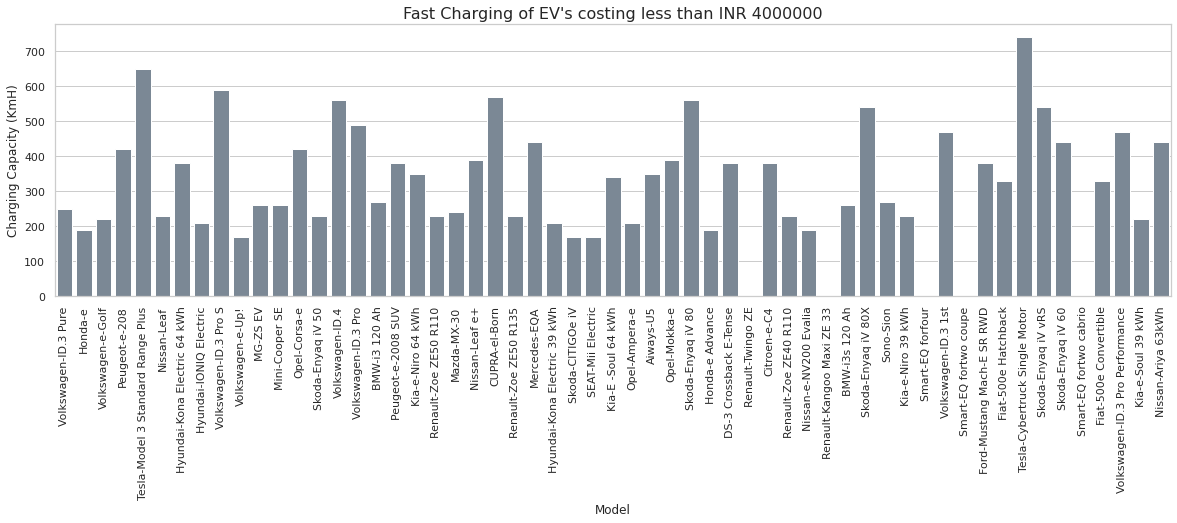

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


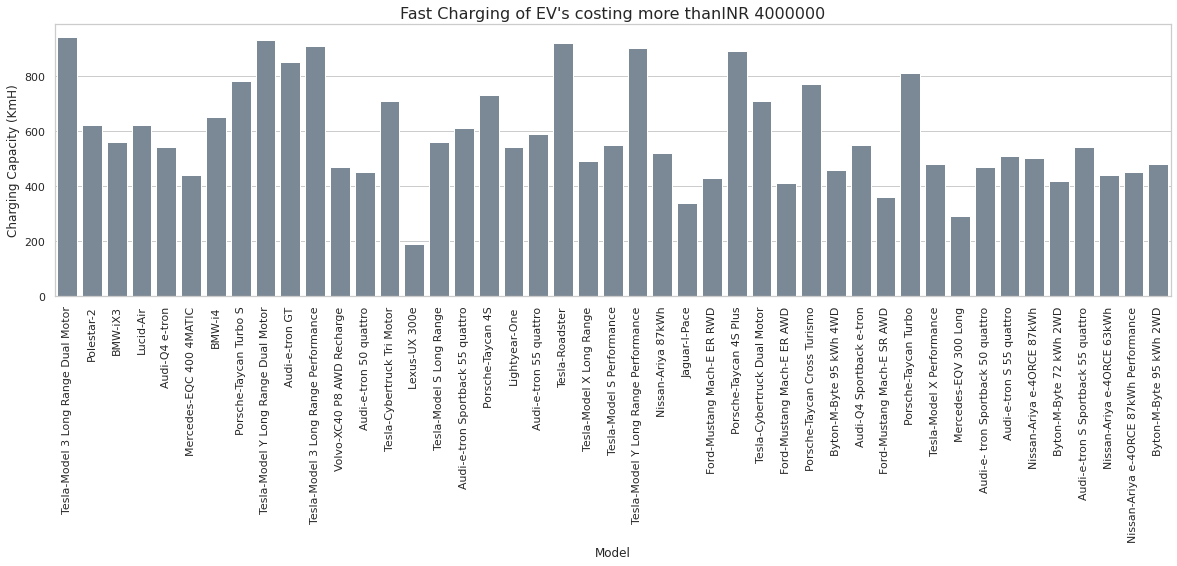

In [63]:
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sbn.set_theme(style="whitegrid")
    sbn.barplot('CarName', 'FastCharge_KmH', data=dataframe, color = 'lightslategrey')
    plt.title('''Fast Charging of EV's costing {}'''.format(price), fontsize = 16)
    plt.ylabel('Charging Capacity (KmH)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()
    
fastcharge(df1, t1)    
fastcharge(df2, t2) 

# **Basic Analysis**

# Vehicles to buy under INR 40,00000 with max range(Km)

In [64]:
top_range_1 = df1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['CarName', 'Range_Km', 'Battery_Pack Kwh', 'INR', 'RapidCharge']])

                              CarName  Range_Km  Battery_Pack Kwh         INR  \
15              Volkswagen-ID.3 Pro S       440              77.0  3350574.76   
37                      CUPRA-el-Born       425              77.0  3683209.50   
53                  Skoda-Enyaq iV 80       420              77.0  3273964.00   
25                    Volkswagen-ID.4       420              77.0  3683209.50   
88                 Skoda-Enyaq iV vRS       400              77.0  3887832.25   
12       Hyundai-Kona Electric 64 kWh       400              64.0  3339034.04   
71                 Skoda-Enyaq iV 80X       400              77.0  3683209.50   
86      Tesla-Cybertruck Single Motor       390             100.0  3683209.50   
31                  Kia-e-Niro 64 kWh       370              64.0  3118859.96   
45                 Kia-E -Soul 64 kWh       365              64.0  3015075.30   
83         Ford-Mustang Mach-E SR RWD       360              88.0  3838722.79   
39                       Mer

# Vehicles with best Acceleration under INR 40,00000

In [69]:
acceleration = df1.sort_values(by= 'AccelSec')
print(acceleration[['CarName','AccelSec','Range_Km','Battery_Pack Kwh','INR']])

                              CarName  AccelSec  Range_Km  Battery_Pack Kwh  \
39                       Mercedes-EQA       5.0       350              66.5   
8   Tesla-Model 3 Standard Range Plus       5.6       310              50.0   
88                 Skoda-Enyaq iV vRS       6.2       400              77.0   
37                      CUPRA-el-Born       6.5       425              77.0   
83         Ford-Mustang Mach-E SR RWD       6.6       360              88.0   
70                     BMW-i3s 120 Ah       6.9       230              37.9   
86      Tesla-Cybertruck Single Motor       7.0       390             100.0   
71                 Skoda-Enyaq iV 80X       7.0       400              77.0   
35                     Nissan-Leaf e+       7.3       325              56.0   
19                     Mini-Cooper SE       7.3       185              28.9   
28                      BMW-i3 120 Ah       7.3       235              37.9   
80                Volkswagen-ID.3 1st       7.3     

# Vehicles with Maximum Efficiency

In [66]:
efficiency = df.sort_values(by = 'Efficiency_WhKm')
print(efficiency[['CarName', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']])

                               CarName  Efficiency_WhKm  Range_Km PowerTrain  \
48                       Lightyear-One              104       575        AWD   
14              Hyundai-IONIQ Electric              153       250        FWD   
8    Tesla-Model 3 Standard Range Plus              153       310        RWD   
41        Hyundai-Kona Electric 39 kWh              154       255        FWD   
74                           Sono-Sion              156       225        FWD   
..                                 ...              ...       ...        ...   
98  Audi-e-tron S Sportback 55 quattro              258       335        AWD   
67         Tesla-Cybertruck Dual Motor              261       460        AWD   
33          Tesla-Cybertruck Tri Motor              267       750        AWD   
90            Audi-e-tron S 55 quattro              270       320        AWD   
84               Mercedes-EQV 300 Long              273       330        FWD   

    Battery_Pack Kwh          INR  
48 